# **Customer Creditworthiness Classification Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('CCC.csv')

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
m=df["Month"]=="January"

In [ ]:
df1=df[m]

In [ ]:
df1

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
24,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871073616,Low_spent_Large_value_payments,433.6047729627723,Standard
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547.71_,2853.309167,7,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.72539431736266,!@9#%8,288.60552234930395,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,27.289440,28 Years and 1 Months,No,50894.000000,78.51494451125625,High_spent_Small_value_payments,493.341182,Good
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good
99976,0x25fce,CUS_0xaf61,January,Chris Wickhamm,49,133-16-7738,Writer,37188.1,3097.008333,1,...,Good,620.64,39.080823,29 Years and 9 Months,No,84.205949,223.87501818278344,Low_spent_Small_value_payments,291.619866,Good
99984,0x25fda,CUS_0x8600,January,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007268804,High_spent_Large_value_payments,328.655224,Poor


In [ ]:
df1.drop(['ID', 'Customer_ID', 'Month','Name', 'SSN','Type_of_Loan'],axis=1,inplace=True)

# **Data Preprocessing**

In [ ]:
df1

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
8,28_,_______,34847.84,3037.986667,2,4,6,1,3,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,34,_______,143162.64,12187.220000,1,5,8,3,5,8,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
24,54,Entrepreneur,30689.89,2612.490833,2,5,4,1,0,6,...,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871073616,Low_spent_Large_value_payments,433.6047729627723,Standard
32,21,Developer,35547.71_,2853.309167,7,5,5,0,5,NaN,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.72539431736266,!@9#%8,288.60552234930395,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,18,Lawyer,42903.79,3468.315833,0,4,6,1,14,0,...,Good,1079.48,27.289440,28 Years and 1 Months,No,50894.000000,78.51494451125625,High_spent_Small_value_payments,493.341182,Good
99968,44,Media_Manager,16680.35,1528.029167,1,1,5,4,4,0,...,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good
99976,49,Writer,37188.1,3097.008333,1,4,5,3,7,12,...,Good,620.64,39.080823,29 Years and 9 Months,No,84.205949,223.87501818278344,Low_spent_Small_value_payments,291.619866,Good
99984,28,Architect,20002.88,1929.906667,10,8,29,5_,35,26,...,Bad,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007268804,High_spent_Large_value_payments,328.655224,Poor


<Axes: >

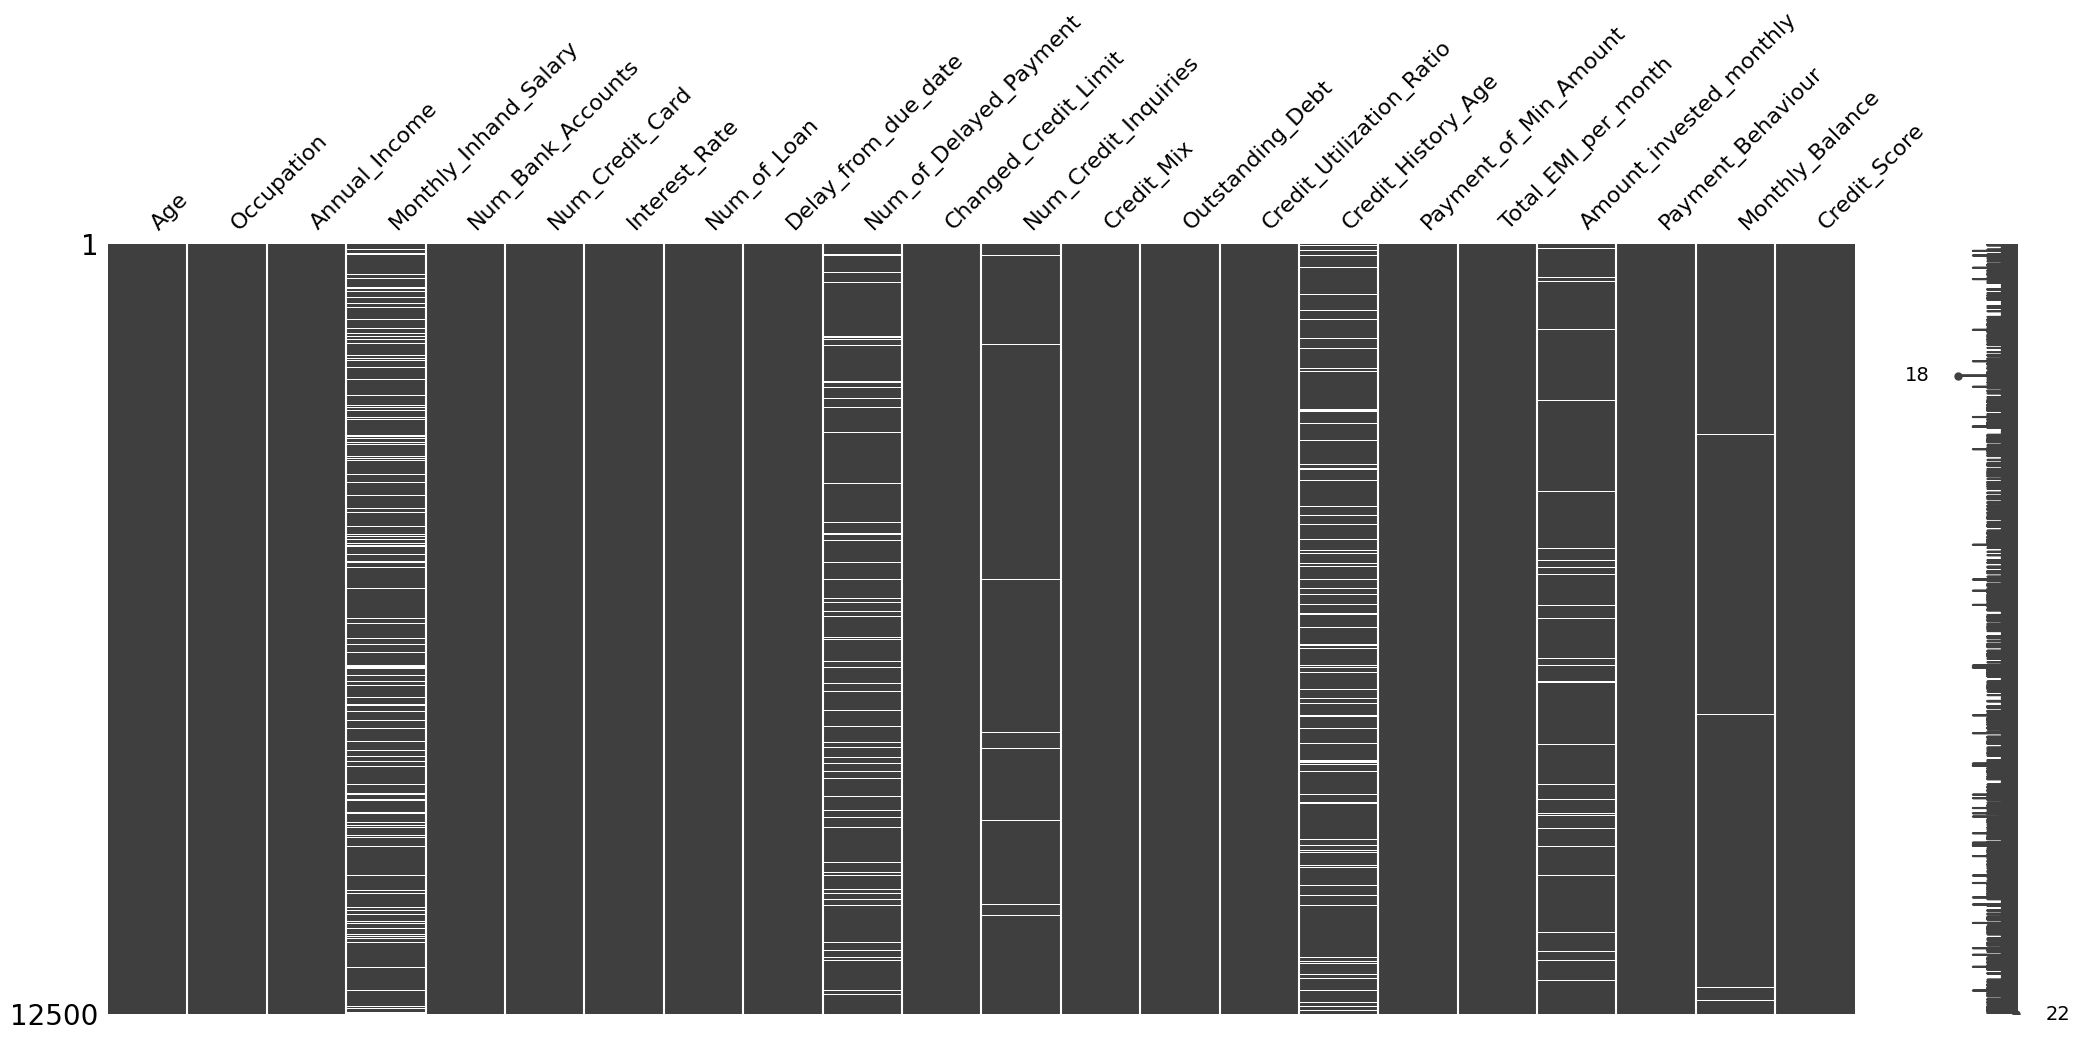

In [ ]:
import missingno as mn
mn.matrix(df1)

In [ ]:
df1["Age"] = df1["Age"].astype(str).str.replace(r'\D', '', regex=True).astype(int)


In [ ]:
m=df1["Age"]<=90

In [ ]:
df1=df1[m]

In [ ]:
df1["Annual_Income"] = df1["Annual_Income"].astype(str).str.replace(r'\D', '', regex=True).astype(int)

In [ ]:
df1['Occupation']=df1['Occupation'].replace("_______","Others")

In [ ]:
df1["Num_of_Delayed_Payment"].isnull().sum()

np.int64(822)

In [ ]:
df1["Num_of_Delayed_Payment"] = pd.to_numeric(df1["Num_of_Delayed_Payment"], errors='coerce').fillna(0).astype(int)

In [ ]:
m=df1["Num_of_Delayed_Payment"]<=100

In [ ]:
df1=df1[m]

In [ ]:
df1["Changed_Credit_Limit"]=df1["Changed_Credit_Limit"].astype(str).str.replace('_', '0').astype(float)

In [ ]:
m=df1["Num_Credit_Inquiries"]<=12.0

In [ ]:
df1=df1[m]

In [ ]:
df1["Num_Credit_Inquiries"].value_counts()

,count
Num_Credit_Inquiries,
4.0,1542
1.0,1203
2.0,1191
0.0,1180
3.0,1150
8.0,945
7.0,938
6.0,915
10.0,539


In [ ]:
df1

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,1911412,1824.843333,3,4,3,4,3,7,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
8,28,Others,3484784,3037.986667,2,4,6,1,3,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,34,Others,14316264,12187.220000,1,5,8,3,5,8,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
24,54,Entrepreneur,3068989,2612.490833,2,5,4,1,0,6,...,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871073616,Low_spent_Large_value_payments,433.6047729627723,Standard
32,21,Developer,3554771,2853.309167,7,5,5,0,5,0,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.72539431736266,!@9#%8,288.60552234930395,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,18,Lawyer,4290379,3468.315833,0,4,6,1,14,0,...,Good,1079.48,27.289440,28 Years and 1 Months,No,50894.000000,78.51494451125625,High_spent_Small_value_payments,493.341182,Good
99968,44,Media_Manager,1668035,1528.029167,1,1,5,4,4,0,...,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good
99976,49,Writer,371881,3097.008333,1,4,5,3,7,12,...,Good,620.64,39.080823,29 Years and 9 Months,No,84.205949,223.87501818278344,Low_spent_Small_value_payments,291.619866,Good
99984,28,Architect,2000288,1929.906667,10,8,29,5_,35,26,...,Bad,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007268804,High_spent_Large_value_payments,328.655224,Poor


In [ ]:
df1["Credit_Mix"]=df1["Credit_Mix"].replace("_","Standard")

In [ ]:
df1["Credit_Mix"].value_counts()

,count
Credit_Mix,
Standard,6597
Good,2790
Bad,2234


In [ ]:
df1["Changed_Credit_Limit"].value_counts()

,count
Changed_Credit_Limit,
0.00,218
8.30,16
7.69,16
4.92,15
8.23,15
...,...
20.25,1
1.80,1
22.59,1


In [ ]:
df1["Credit_History_Age"].value_counts()

,count
Credit_History_Age,
17 Years and 7 Months,72
15 Years and 5 Months,67
18 Years and 10 Months,66
15 Years and 3 Months,65
15 Years and 7 Months,65
...,...
4 Years and 3 Months,5
0 Years and 5 Months,5
3 Years and 8 Months,4


In [ ]:
import pandas as pd

# Sample function to convert "X Years and Y Months" to total months
def convert_to_months(x):
    try:
        parts = x.split('and')
        years = int(parts[0].strip().split()[0])
        months = int(parts[1].strip().split()[0])
        return years * 12 + months
    except:
        return None  # For cases like missing or malformed strings

# Apply to the column
df1['Credit_History_Age_Months'] = df1['Credit_History_Age'].apply(convert_to_months)


In [ ]:
df1.drop(["Credit_History_Age"],axis=1,inplace=True)

In [ ]:
df1['Credit_History_Age_Months'].fillna(0, inplace=True)

In [ ]:
df1['Payment_of_Min_Amount'].isnull().sum()

np.int64(0)

In [ ]:
df1['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,6083
No,4137
NM,1401


In [ ]:
df1['Num_of_Loan']=df1["Num_of_Loan"].astype(str).str.replace(r'\D', '', regex=True).astype(int)

In [ ]:
df1['Outstanding_Debt']=df1['Outstanding_Debt'].astype(str).str.replace(r'\D', '', regex=True).astype(int)

In [ ]:
df1['Amount_invested_monthly'].fillna(0, inplace=True)

In [ ]:
df1['Amount_invested_monthly']=df1['Amount_invested_monthly'].astype(str).str.replace(r'\D', '', regex=True).astype(float)

In [ ]:
df1["Monthly_Balance"].fillna(0,inplace=True)

In [ ]:
df1["Monthly_Balance"]=df1["Monthly_Balance"].astype(str).str.replace(r'\D', '', regex=True).astype(float)

In [ ]:
mean=df1['Monthly_Inhand_Salary'].mean()

In [ ]:
df1["Monthly_Inhand_Salary"].fillna(mean,inplace=True)

In [ ]:
df1['Payment_Behaviour'].replace("!@9#%8","Not_Specified",inplace=True)

In [ ]:
df1.reset_index(drop=True, inplace=True)


In [ ]:
df1

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,1911412,1824.843333,3,4,3,4,3,7,...,Standard,80998,26.822620,No,49.574949,8.041530e+15,High_spent_Small_value_payments,3.124941e+16,Good,265.0
1,28,Others,3484784,3037.986667,2,4,6,1,3,4,...,Good,60503,24.464031,No,18.816215,1.042918e+14,Low_spent_Small_value_payments,4.706906e+16,Standard,319.0
2,34,Others,14316264,12187.220000,1,5,8,3,5,8,...,Good,130301,28.616735,No,246.992319,1.684137e+14,Not_Specified,1.043316e+16,Good,213.0
3,54,Entrepreneur,3068989,2612.490833,2,5,4,1,0,6,...,Good,63246,26.544229,No,16.415452,8.122886e+15,Low_spent_Large_value_payments,4.336048e+15,Standard,207.0
4,21,Developer,3554771,2853.309167,7,5,5,0,5,0,...,Standard,94386,39.797764,Yes,0.000000,2.767254e+16,Not_Specified,2.886055e+16,Standard,368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616,18,Lawyer,4290379,3468.315833,0,4,6,1,14,0,...,Good,107948,27.289440,No,50894.000000,7.851494e+15,High_spent_Small_value_payments,4.933412e+15,Good,337.0
11617,44,Media_Manager,1668035,1528.029167,1,1,5,4,4,0,...,Good,89716,39.868572,NM,41.113561,5.295198e+15,High_spent_Small_value_payments,3.187374e+16,Good,0.0
11618,49,Writer,371881,3097.008333,1,4,5,3,7,12,...,Good,62064,39.080823,No,84.205949,2.238750e+16,Low_spent_Small_value_payments,2.916199e+16,Good,357.0
11619,28,Architect,2000288,1929.906667,10,8,29,5,35,26,...,Bad,35717,22.895966,Yes,60.964772,4.337067e+15,High_spent_Large_value_payments,3.286552e+15,Poor,68.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11621 entries, 0 to 11620
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        11621 non-null  int64  
 1   Occupation                 11621 non-null  object 
 2   Annual_Income              11621 non-null  int64  
 3   Monthly_Inhand_Salary      11621 non-null  float64
 4   Num_Bank_Accounts          11621 non-null  int64  
 5   Num_Credit_Card            11621 non-null  int64  
 6   Interest_Rate              11621 non-null  int64  
 7   Num_of_Loan                11621 non-null  int64  
 8   Delay_from_due_date        11621 non-null  int64  
 9   Num_of_Delayed_Payment     11621 non-null  int64  
 10  Changed_Credit_Limit       11621 non-null  float64
 11  Num_Credit_Inquiries       11621 non-null  float64
 12  Credit_Mix                 11621 non-null  object 
 13  Outstanding_Debt           11621 non-null  int

In [ ]:
df1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
count,11621.000000,1.162100e+04,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,1.162100e+04,1.162100e+04,11621.000000
mean,33.052491,1.596688e+14,4204.109800,17.115481,21.379141,69.040014,10.866965,21.106531,12.054729,10.235382,4.930901,128933.629894,32.286013,1281.679539,1.165835e+16,1.418434e+16,198.069874
std,10.771288,1.151494e+15,2950.521761,117.996636,122.441168,456.825510,59.274065,14.884218,7.229382,6.856237,3.540271,115608.671337,5.084878,8033.950907,1.269999e+16,1.394533e+16,113.372519
min,14.000000,7.046500e+04,303.645417,0.000000,1.000000,1.000000,0.000000,-5.000000,-3.000000,-6.430000,0.000000,12.000000,20.992914,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,24.000000,1.829089e+06,1784.052500,4.000000,4.000000,8.000000,2.000000,10.000000,7.000000,5.090000,2.000000,39884.000000,28.118877,29.106311,2.628447e+15,3.223505e+15,112.000000
50%,33.000000,3.844452e+06,3839.273333,6.000000,5.000000,14.000000,3.000000,18.000000,12.000000,9.340000,4.000000,102571.000000,32.263362,66.158038,7.755870e+15,6.489405e+15,205.000000
75%,41.000000,8.366952e+06,5404.491667,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.680000,8.000000,174708.000000,36.449554,149.684408,1.550112e+16,2.631947e+16,289.000000
max,55.000000,1.349284e+16,15204.633333,1779.000000,1479.000000,5788.000000,1480.000000,67.000000,84.000000,36.490000,12.000000,499807.000000,49.564519,82122.000000,6.398399e+16,6.359929e+16,397.000000


In [ ]:
(df1['Num_Bank_Accounts']>20).sum() # random imputation 0 to 5  # >20
import numpy as np

# Generate random integers for each value > 20
df1.loc[df1['Num_Bank_Accounts'] > 20, 'Num_Bank_Accounts'] = np.random.randint(0, 6, size=(df1['Num_Bank_Accounts'] > 20).sum())


In [ ]:
df1.loc[df1['Num_Credit_Card'] > 20, 'Num_Credit_Card'] = np.random.randint(0, 6, size=(df1['Num_Credit_Card'] > 20).sum())

In [ ]:
(df1['Num_Credit_Card']>20).sum() # random imputation 0 to 5  # >20

np.int64(0)

In [ ]:
df1.loc[df1['Interest_Rate'] > 50, 'Interest_Rate'] = np.random.randint(5, 31, size=(df1['Interest_Rate'] > 50).sum())

In [ ]:
(df1['Interest_Rate']>50).sum()  # random imputation 5 to 30 float  # >50

np.int64(0)

In [ ]:
df1.loc[df1['Num_Credit_Inquiries'] > 30, 'Num_Credit_Inquiries'] = np.random.randint(5, 30, size=(df1['Num_Credit_Inquiries'] > 30).sum())

In [ ]:
(df1["Num_Credit_Inquiries"]>30).sum()  # random imputation 5 to 30  # 50

np.int64(0)

In [ ]:
df1.loc[df1['Num_of_Loan'] > 200, 'Num_of_Loan'] = np.random.randint(0, 100, size=(df1['Num_of_Loan'] > 200).sum())

In [ ]:
(df1["Num_of_Loan"]>200).sum()

np.int64(0)

# **Data Description**

In [ ]:
df1.sample(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
7766,39,Architect,5283729,4230.107500,6,9,31,6,43,24,...,Bad,496921,39.167866,Yes,144.296195,6.262338e+16,High_spent_Medium_value_payments,4.660912e+15,Standard,146.0
7694,25,Others,1554906,1589.755000,6,6,17,2,43,19,...,Standard,206391,26.811697,Yes,20.165890,5.354621e+15,Low_spent_Medium_value_payments,3.652634e+15,Poor,202.0
10161,30,Developer,6879022,5872.518333,3,5,6,3,4,10,...,Good,39979,36.710430,No,163.410256,8.850806e+15,High_spent_Large_value_payments,5.753335e+15,Good,320.0
11572,49,Lawyer,7662448,4204.109800,0,2,8,0,13,9,...,Good,78142,39.938998,No,0.000000,8.316283e+15,High_spent_Large_value_payments,7.691745e+11,Good,209.0
5542,38,Journalist,390145,3456.208333,4,7,5,100,16,15,...,Good,130166,39.465612,No,0.000000,5.130909e+16,High_spent_Large_value_payments,5.343117e+15,Poor,182.0


| **S.No.** | **Column Name**            | **Description**                                                              |
| --------- | -------------------------- | ---------------------------------------------------------------------------- |
| 1         | `Age`                      | Age of the individual in years.                                              |
| 2         | `Occupation`               | Profession or job type of the individual.                                    |
| 3         | `Annual_Income`            | Total yearly income reported by the individual.                              |
| 4         | `Monthly_Inhand_Salary`    | Monthly income after deductions (net salary).                                |
| 5         | `Num_Bank_Accounts`        | Total number of bank accounts held.                                          |
| 6         | `Num_Credit_Card`          | Total number of credit cards owned.                                          |
| 7         | `Interest_Rate`            | Interest rate applied on active loans or credit cards.                       |
| 8         | `Num_of_Loan`              | Number of loans taken by the individual.                                     |
| 9         | `Delay_from_due_date`      | Average number of days the individual delays credit payments.                |
| 10        | `Num_of_Delayed_Payment`   | Total number of times payment was delayed.                                   |
| 11        | `Changed_Credit_Limit`     | Total change in credit limit (increased or decreased).                       |
| 12        | `Num_Credit_Inquiries`     | Number of times credit inquiries were made (e.g., during loan applications). |
| 13        | `Credit_Mix`               | Type of credit used (e.g., Good mix of secured/unsecured credit).            |
| 14        | `Outstanding_Debt`         | Amount of unpaid debt remaining.                                             |
| 15        | `Credit_Utilization_Ratio` | Ratio of used credit to total credit limit.                                  |
| 16        | `Payment_of_Min_Amount`    | Indicates if the individual pays at least the minimum due amount.            |
| 17        | `Total_EMI_per_month`      | Sum of all monthly EMI payments made.                                        |
| 18        | `Amount_invested_monthly`  | Amount invested in financial instruments each month.                         |
| 19        | `Payment_Behaviour`        | Description of payment habits or tendencies.                                 |
| 20        | `Monthly_Balance`          | Balance amount remaining at the end of each month.                           |
| 21        | `Credit_Score`             | Creditworthiness rating (e.g., Good, Standard, Poor).                        |
| 22        | `Credit_History_Age`       | Age of credit history, typically given in years and months.                  |


In [ ]:
df1.shape

(11621, 22)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11621 entries, 0 to 11620
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        11621 non-null  int64  
 1   Occupation                 11621 non-null  object 
 2   Annual_Income              11621 non-null  int64  
 3   Monthly_Inhand_Salary      11621 non-null  float64
 4   Num_Bank_Accounts          11621 non-null  int64  
 5   Num_Credit_Card            11621 non-null  int64  
 6   Interest_Rate              11621 non-null  int64  
 7   Num_of_Loan                11621 non-null  int64  
 8   Delay_from_due_date        11621 non-null  int64  
 9   Num_of_Delayed_Payment     11621 non-null  int64  
 10  Changed_Credit_Limit       11621 non-null  float64
 11  Num_Credit_Inquiries       11621 non-null  float64
 12  Credit_Mix                 11621 non-null  object 
 13  Outstanding_Debt           11621 non-null  int

**There are 4 object type independent columns in the dataset**

In [ ]:
df1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
count,11621.000000,1.162100e+04,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,11621.000000,1.162100e+04,1.162100e+04,11621.000000
mean,33.052491,1.596688e+14,4204.109800,5.332588,5.466139,14.611996,7.682471,21.106531,12.054729,10.235382,4.930901,128933.629894,32.286013,1281.679539,1.165835e+16,1.418434e+16,198.069874
std,10.771288,1.151494e+15,2950.521761,2.600932,2.109440,8.736315,19.571134,14.884218,7.229382,6.856237,3.540271,115608.671337,5.084878,8033.950907,1.269999e+16,1.394533e+16,113.372519
min,14.000000,7.046500e+04,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.430000,0.000000,12.000000,20.992914,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,24.000000,1.829089e+06,1784.052500,3.000000,4.000000,8.000000,2.000000,10.000000,7.000000,5.090000,2.000000,39884.000000,28.118877,29.106311,2.628447e+15,3.223505e+15,112.000000
50%,33.000000,3.844452e+06,3839.273333,5.000000,5.000000,13.000000,3.000000,18.000000,12.000000,9.340000,4.000000,102571.000000,32.263362,66.158038,7.755870e+15,6.489405e+15,205.000000
75%,41.000000,8.366952e+06,5404.491667,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.680000,8.000000,174708.000000,36.449554,149.684408,1.550112e+16,2.631947e+16,289.000000
max,55.000000,1.349284e+16,15204.633333,10.000000,17.000000,34.000000,143.000000,67.000000,84.000000,36.490000,12.000000,499807.000000,49.564519,82122.000000,6.398399e+16,6.359929e+16,397.000000


# **Univariate Data Analysis**

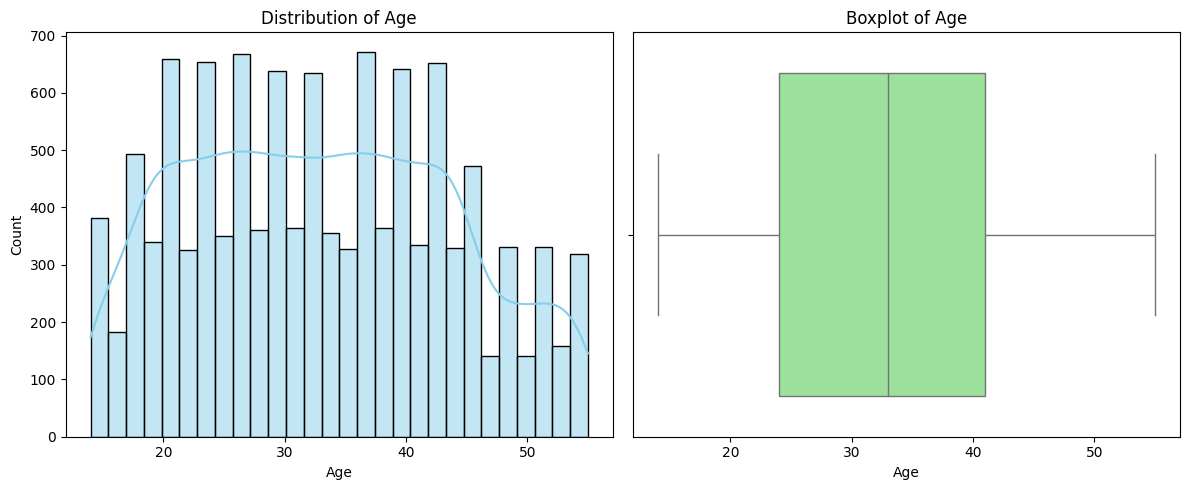

In [ ]:
    plt.figure(figsize=(12, 5))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df1["Age"], kde=True, color='skyblue')
    plt.title('Distribution of Age')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1["Age"], color='lightgreen')
    plt.title('Boxplot of Age')

    plt.tight_layout()
    plt.show()

In [ ]:
# shapiro wilk test
from scipy.stats import shapiro
stat,p=shapiro(df1["Age"])
print("stat",stat,"p",p)

stat 0.9723839227162953 p 2.6190446347596005e-42


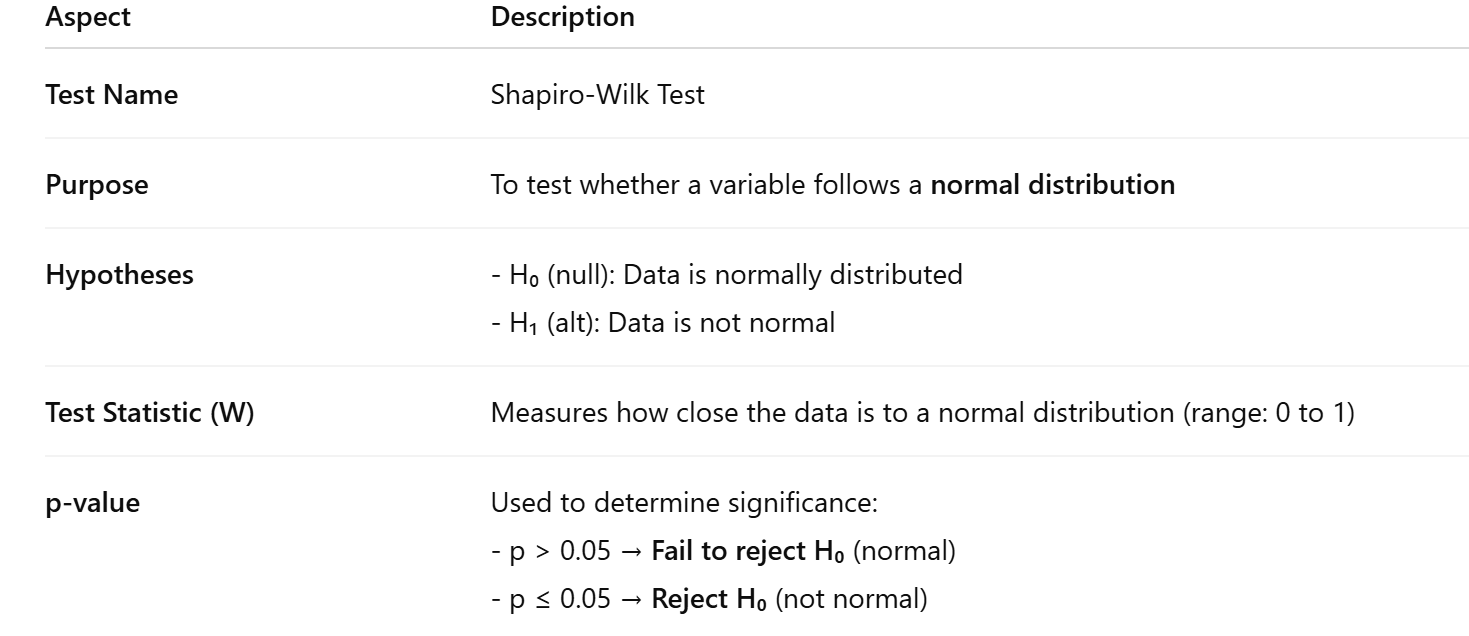

**Approximately the KDE plot of age seems to be normally distributed but shapiro wilk test rejects the normality. Also no outliers are there.**

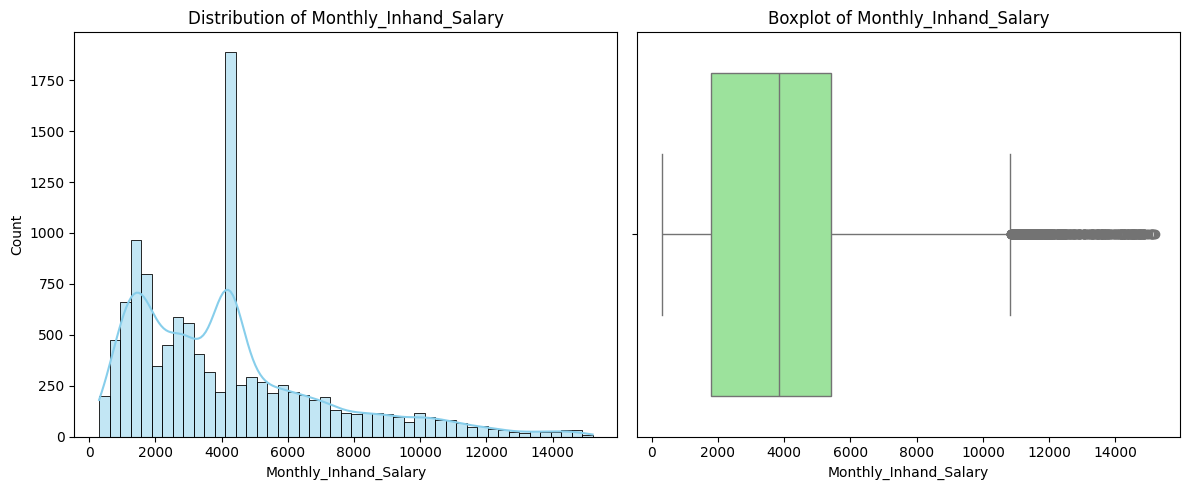

In [ ]:
    plt.figure(figsize=(12, 5))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df1["Monthly_Inhand_Salary"], kde=True, color='skyblue')
    plt.title('Distribution of Monthly_Inhand_Salary')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1["Monthly_Inhand_Salary"], color='lightgreen')
    plt.title('Boxplot of Monthly_Inhand_Salary')

    plt.tight_layout()
    plt.show()

**Positively skewed bimodal distribution with many outliers. These outliers are realistic and expected in Monthly_Inhand_Salary column.**

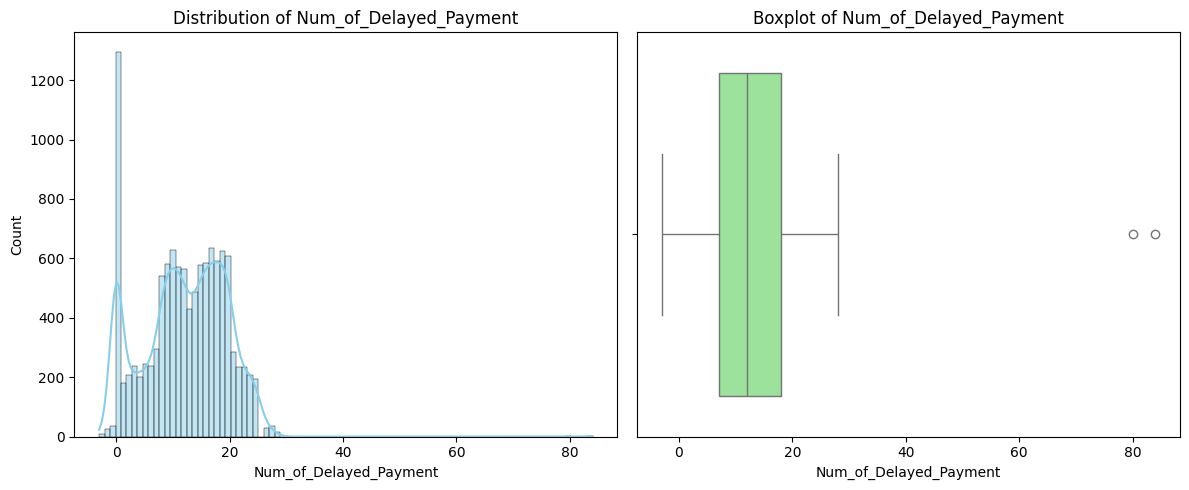

In [ ]:
    plt.figure(figsize=(12, 5))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df1["Num_of_Delayed_Payment"], kde=True, color='skyblue')
    plt.title('Distribution of Num_of_Delayed_Payment')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1["Num_of_Delayed_Payment"], color='lightgreen')
    plt.title('Boxplot of Num_of_Delayed_Payment')

    plt.tight_layout()
    plt.show()

**Two oultliers found & should be handled**

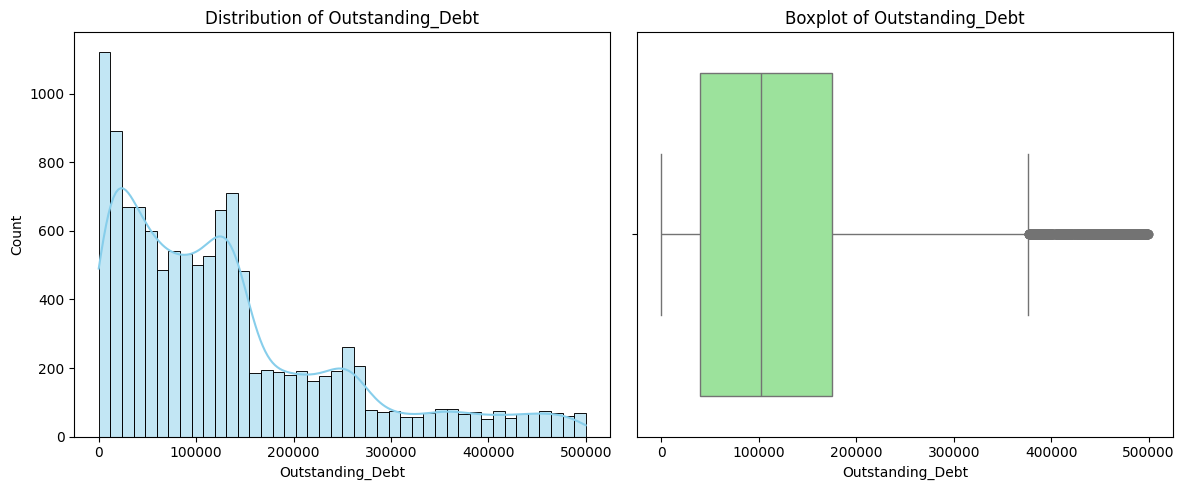

In [ ]:
    plt.figure(figsize=(12, 5))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df1["Outstanding_Debt"], kde=True, color='skyblue')
    plt.title('Distribution of Outstanding_Debt')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1["Outstanding_Debt"], color='lightgreen')
    plt.title('Boxplot of Outstanding_Debt')

    plt.tight_layout()
    plt.show()

**Positively skewed distribution with many outliers. These outliers are realistic and expected in Outstanding_Debt column.**

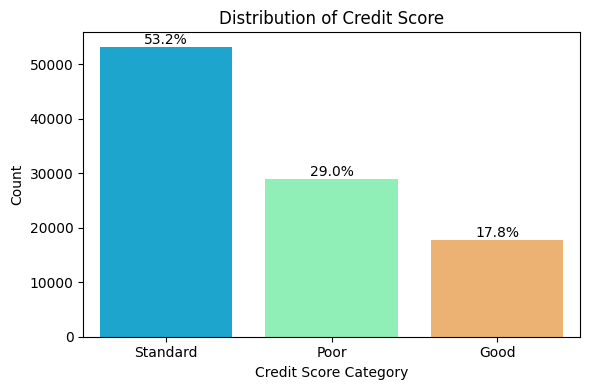

In [ ]:
# Set figure size
plt.figure(figsize=(6, 4))

# Countplot with sorted order
order = df['Credit_Score'].value_counts().index
ax = sns.countplot(data=df, x='Credit_Score', palette="rainbow", order=order)

# Title and axis labels
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')

# Calculate total count for percentage calculation
total = len(df)

# Add percentage labels on each bar
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=10, color='black')

# Layout and show plot
plt.tight_layout()
plt.show()


**Response column is not fairly balanced**

# **Bivariate Data Analysis**

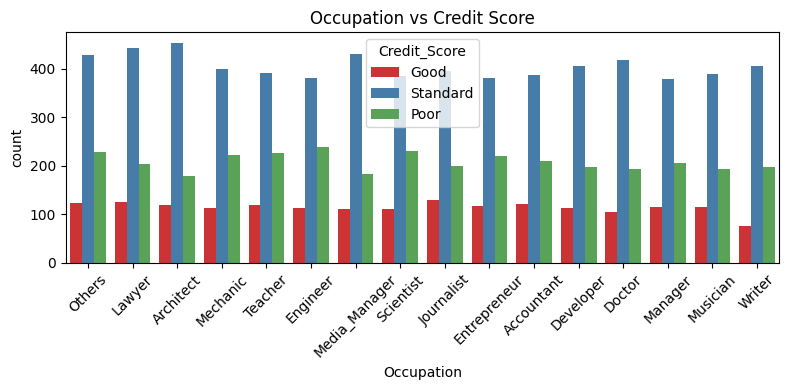

In [ ]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df1, x="Occupation", hue="Credit_Score", palette='Set1', order=df1["Occupation"].value_counts().index)
    plt.title('Occupation vs Credit Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**For each occupation the number of good credit scores are less than bad and bad is less than that of standard**

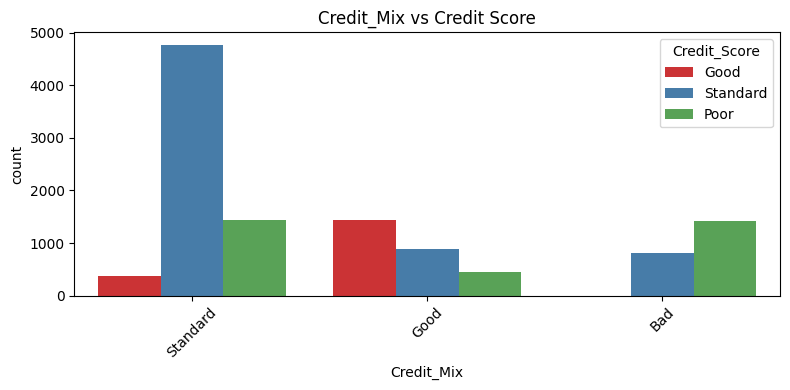

In [ ]:

    plt.figure(figsize=(8, 4))
    sns.countplot(data=df1, x="Credit_Mix", hue="Credit_Score", palette='Set1', order=df1["Credit_Mix"].value_counts().index)
    plt.title('Credit_Mix vs Credit Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



**Customer having Bad credit mix can not have Good credit score.**
**Good credit mix indicates the higher chances of good credit score**

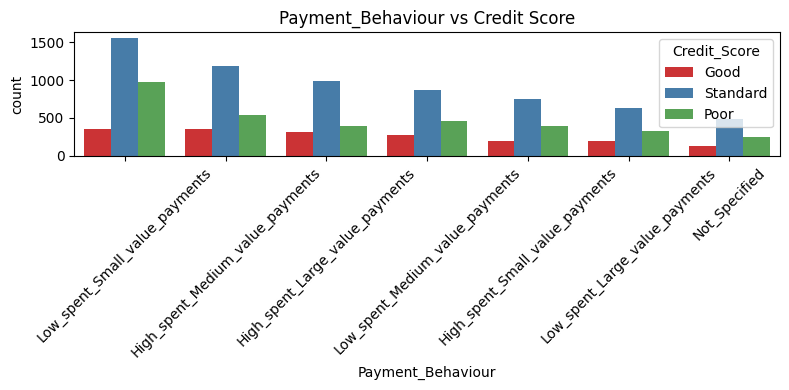

In [ ]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df1, x="Payment_Behaviour", hue="Credit_Score", palette='Set1', order=df1["Payment_Behaviour"].value_counts().index)
    plt.title('Payment_Behaviour vs Credit Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Each payment behaviour has approximately same proportion of all three categories of credit scores.**

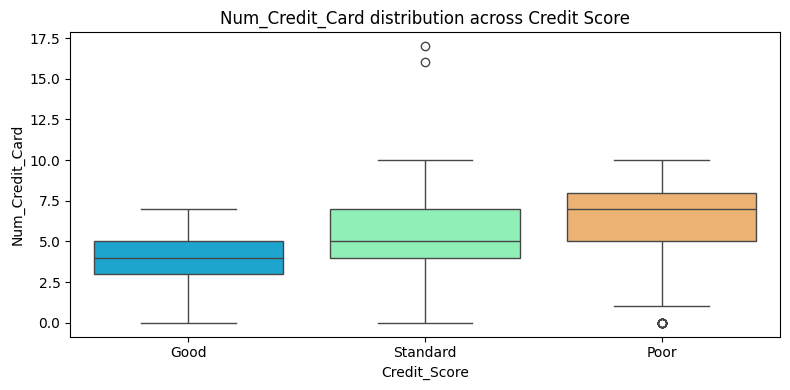

In [ ]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df1, x="Credit_Score", y="Num_Credit_Card", palette='rainbow')
    plt.title('Num_Credit_Card distribution across Credit Score')
    plt.tight_layout()
    plt.show()

**Lower number of credit cards indicates better credit score.**
**Some outliers are also there and we will keep them because they are not unrealistic.**

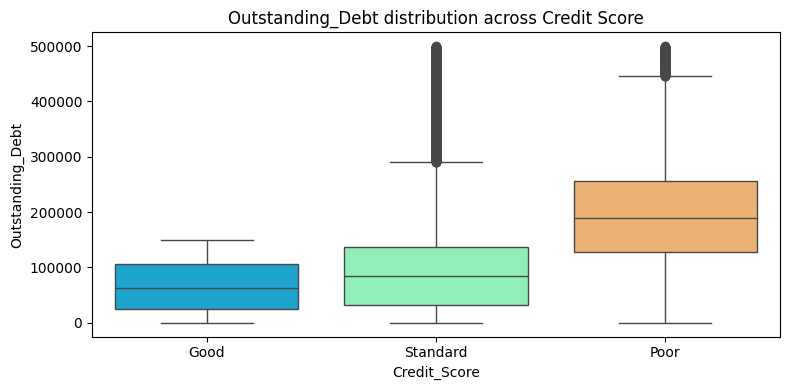

In [ ]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df1, x="Credit_Score", y="Outstanding_Debt", palette='rainbow')
    plt.title('Outstanding_Debt distribution across Credit Score')
    plt.tight_layout()
    plt.show()

**More outstanding debt indicates poor creditworthiness. Also the outliers are expected in standard and poor credit score categories and they are realistic.**

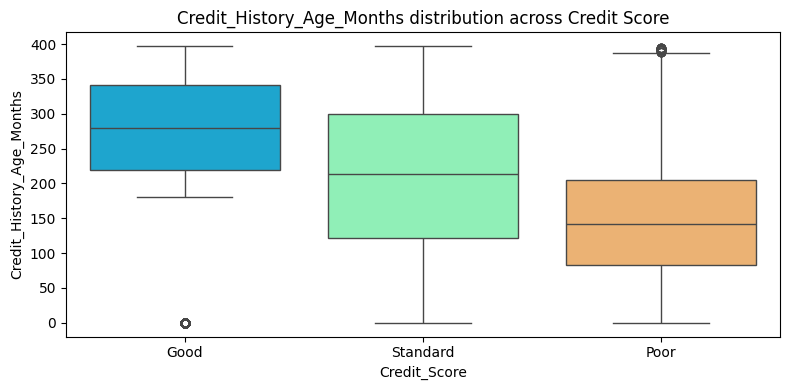

In [ ]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df1, x="Credit_Score", y="Credit_History_Age_Months", palette='rainbow')
    plt.title('Credit_History_Age_Months distribution across Credit Score')
    plt.tight_layout()
    plt.show()

**Longer Credit history indicates better credit score. Also the outliers are natural and realistic in this column.**

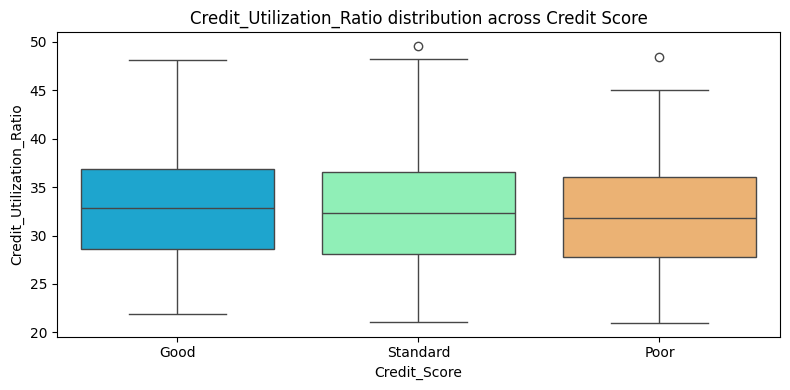

In [ ]:

    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df1, x="Credit_Score", y="Credit_Utilization_Ratio", palette='rainbow')
    plt.title('Credit_Utilization_Ratio distribution across Credit Score')
    plt.tight_layout()
    plt.show()

**People with a "Good" credit score tend to have slightly higher Credit Utilization Ratios on average compared to others. But differences are not very strong. Also outliers are natural and realistic in this column.**

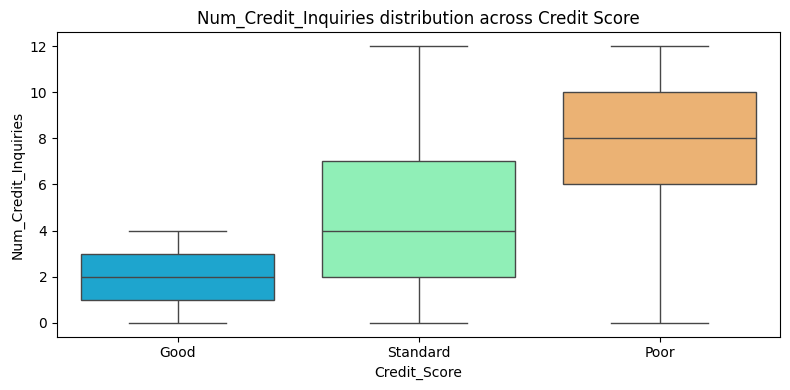

In [ ]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df1, x="Credit_Score", y="Num_Credit_Inquiries", palette='rainbow')
    plt.title('Num_Credit_Inquiries distribution across Credit Score')
    plt.tight_layout()
    plt.show()

**More number of Credit Inquiries indicates Poor credit score**

# **Encoding Categorical Columns & Feature Scaling**

In [ ]:
df1["Credit_Score"].value_counts()

,count
Credit_Score,
Standard,6462
Poor,3330
Good,1829


In [ ]:
df1

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,1911412,1824.843333,3,4,3,4,3,7,...,Standard,80998,26.822620,No,49.574949,8.041530e+15,High_spent_Small_value_payments,3.124941e+16,Good,265.0
1,28,Others,3484784,3037.986667,2,4,6,1,3,4,...,Good,60503,24.464031,No,18.816215,1.042918e+14,Low_spent_Small_value_payments,4.706906e+16,Standard,319.0
2,34,Others,14316264,12187.220000,1,5,8,3,5,8,...,Good,130301,28.616735,No,246.992319,1.684137e+14,Not_Specified,1.043316e+16,Good,213.0
3,54,Entrepreneur,3068989,2612.490833,2,5,4,1,0,6,...,Good,63246,26.544229,No,16.415452,8.122886e+15,Low_spent_Large_value_payments,4.336048e+15,Standard,207.0
4,21,Developer,3554771,2853.309167,7,5,5,0,5,0,...,Standard,94386,39.797764,Yes,0.000000,2.767254e+16,Not_Specified,2.886055e+16,Standard,368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616,18,Lawyer,4290379,3468.315833,0,4,6,1,14,0,...,Good,107948,27.289440,No,50894.000000,7.851494e+15,High_spent_Small_value_payments,4.933412e+15,Good,337.0
11617,44,Media_Manager,1668035,1528.029167,1,1,5,4,4,0,...,Good,89716,39.868572,NM,41.113561,5.295198e+15,High_spent_Small_value_payments,3.187374e+16,Good,0.0
11618,49,Writer,371881,3097.008333,1,4,5,3,7,12,...,Good,62064,39.080823,No,84.205949,2.238750e+16,Low_spent_Small_value_payments,2.916199e+16,Good,357.0
11619,28,Architect,2000288,1929.906667,10,8,29,5,35,26,...,Bad,35717,22.895966,Yes,60.964772,4.337067e+15,High_spent_Large_value_payments,3.286552e+15,Poor,68.0


In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()
le.fit(df1["Credit_Score"]) # 0 good , 1 poor , 2 Standard
df1["Credit_Score"]=le.transform(df1["Credit_Score"])


In [ ]:
# Define the order manually
order = [['Bad', 'Standard','Good' ]]

encoder = OrdinalEncoder(categories=order)
df1['Credit_Mix'] = encoder.fit_transform(df1[['Credit_Mix']])

In [ ]:
df1=pd.get_dummies(df1,columns=["Occupation","Payment_Behaviour","Payment_of_Min_Amount"],drop_first=True)

In [ ]:
df1.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Credit_History_Age_Months', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Others', 'Occupation_Scientist',
       'Occupation_Teacher', 'Occupation_Writer',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_paym

In [ ]:
from sklearn.model_selection import train_test_split

# Select the top features before splitting the data
X = df1.drop("Credit_Score",axis=1)
y = df1["Credit_Score"]

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=9,stratify=y)

In [ ]:
X_train.shape

(9296, 41)

In [ ]:
X_test.shape

(2325, 41)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[6.09756098e-01, 2.97961896e-10, 1.99273225e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.14634146e-01, 2.53813209e-11, 2.61758778e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.43902439e-01, 4.82776267e-10, 3.39536296e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.92682927e-01, 9.67759928e-10, 7.09321902e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.82926829e-01, 4.38781217e-10, 3.27612143e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.19512195e-01, 5.02120607e-10, 3.70239518e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# **Model Building**

## **Handling Imbalance**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_train,y_train = ros.fit_resample(X_train, y_train)


## **Logistic Regression**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Select only numeric columns (drop the target too!)
X = df1.select_dtypes(include='number').drop(columns=['Credit_Score'])  # Replace 'Credit_Score' with your target

# Step 2: Drop rows with NaNs (or fill them as needed)
#X = X.dropna()

# Step 3: Convert to float (important for statsmodels)
X = X.astype(float)

# Step 4: Add constant column
X_const = add_constant(X)

# Step 5: Calculate VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


                      Feature       VIF
0                       const  0.000000
1                         Age  0.614430
2               Annual_Income  1.016310
3       Monthly_Inhand_Salary  0.900371
4           Num_Bank_Accounts  0.879898
5             Num_Credit_Card  0.761203
6               Interest_Rate  1.147458
7                 Num_of_Loan  0.992076
8         Delay_from_due_date  1.169108
9      Num_of_Delayed_Payment  0.911718
10       Changed_Credit_Limit  1.002949
11       Num_Credit_Inquiries  1.298176
12                 Credit_Mix  1.285822
13           Outstanding_Debt  1.492777
14   Credit_Utilization_Ratio  0.257649
15        Total_EMI_per_month  0.999058
16    Amount_invested_monthly  0.958957
17            Monthly_Balance  0.980953
18  Credit_History_Age_Months  0.739404


**No multicollinearity in the dataset, the assumption of Logistic Regression is satisfied.**

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
lr=LogisticRegression(penalty="l2",multi_class='multinomial', solver='lbfgs' , max_iter=100)
lr.fit(X_train,y_train)


LogisticRegression(multi_class='multinomial')

In [ ]:
y_t_pred=lr.predict(X_train)


In [ ]:
print(classification_report(y_train,y_t_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      5169
           1       0.79      0.73      0.76      5169
           2       0.77      0.64      0.70      5169

    accuracy                           0.77     15507
   macro avg       0.77      0.77      0.76     15507
weighted avg       0.77      0.77      0.76     15507



In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.92      0.65       366
           1       0.66      0.73      0.69       666
           2       0.87      0.61      0.72      1293

    accuracy                           0.70      2325
   macro avg       0.68      0.76      0.69      2325
weighted avg       0.75      0.70      0.70      2325



## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_t_pred=dt.predict(X_train)
print(classification_report(y_train,y_t_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5169
           1       1.00      1.00      1.00      5169
           2       1.00      1.00      1.00      5169

    accuracy                           1.00     15507
   macro avg       1.00      1.00      1.00     15507
weighted avg       1.00      1.00      1.00     15507



In [ ]:
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60       366
           1       0.64      0.62      0.63       666
           2       0.75      0.76      0.75      1293

    accuracy                           0.70      2325
   macro avg       0.66      0.66      0.66      2325
weighted avg       0.70      0.70      0.70      2325



**Decision tree is overfitting and it poorly generalises on the test set.**

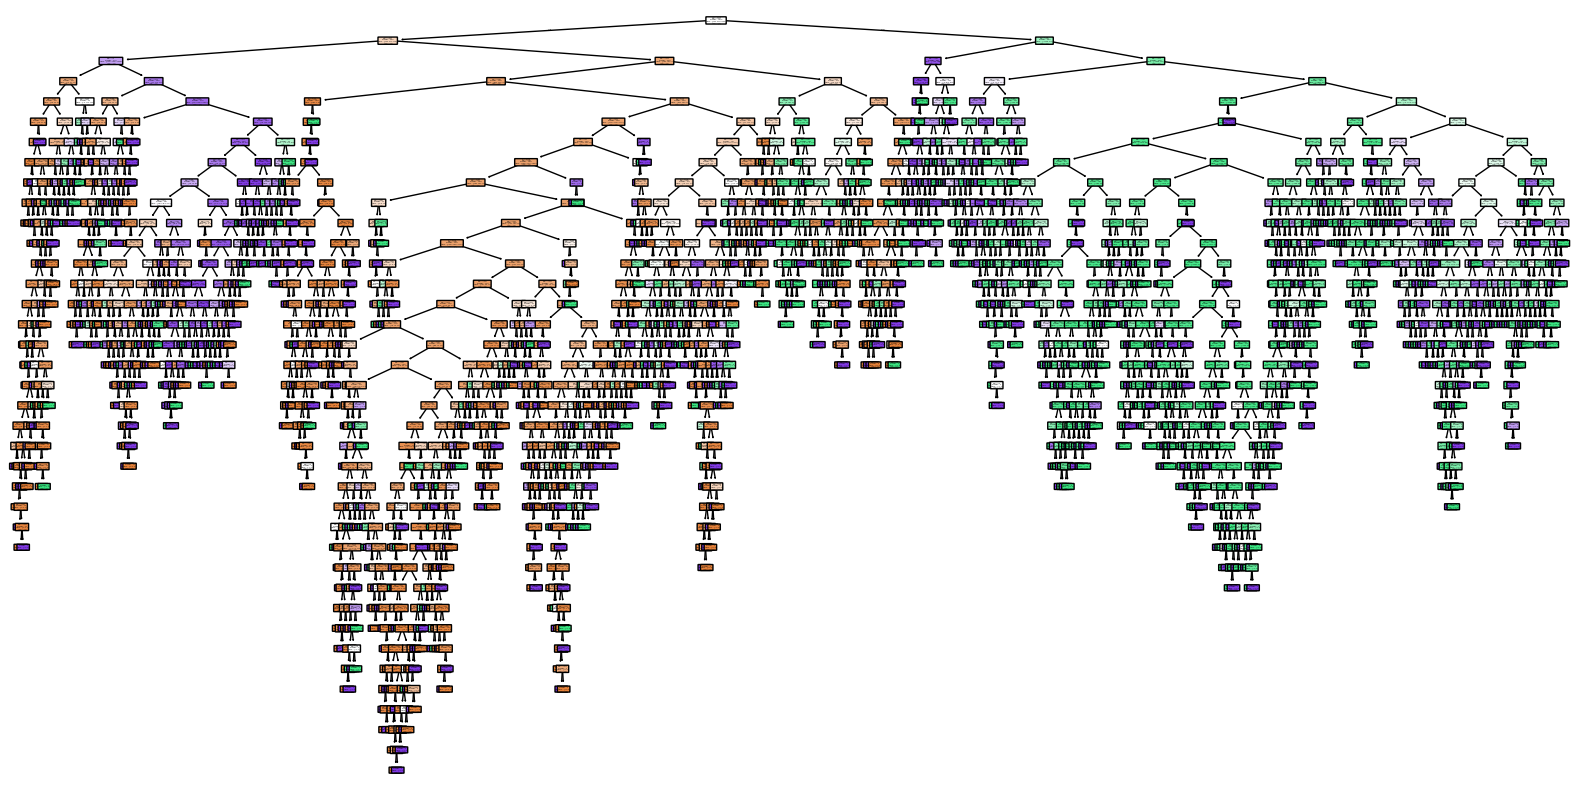

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt,
          filled=True,
          rounded=True,
          class_names=True,
          feature_names=pd.DataFrame(X_train).columns,
          #max_depth=3  # limit depth for clarity
         )
plt.show()


### **Post Pruning For Better Generalisation**

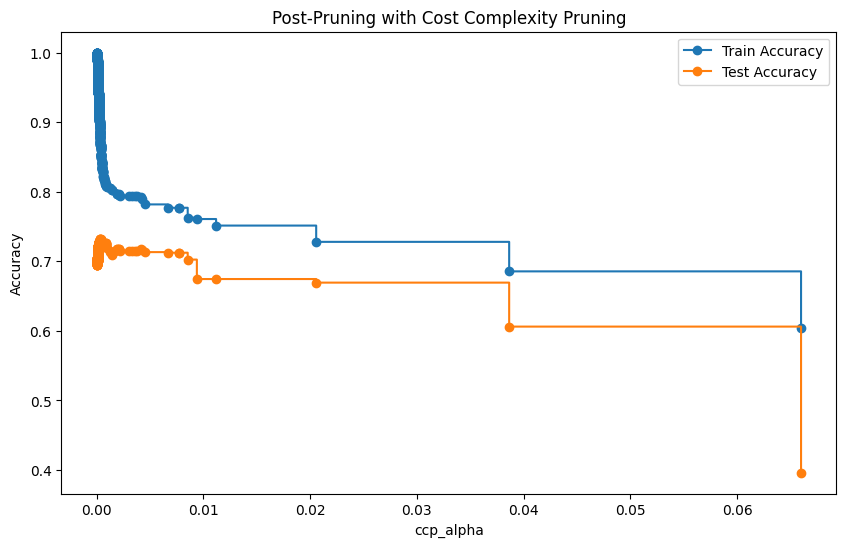

In [ ]:
# Step 1: Get pruning path
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # ignore the last one, which prunes all leaves

# Step 2: Train a tree for each alpha
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Step 3: Evaluate and find best alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Step 4: Plot accuracy vs alpha
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Post-Pruning with Cost Complexity Pruning")
plt.show()


In [ ]:
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0003575446214254493),
                       random_state=42)

In [ ]:
best_alpha

np.float64(0.0003575446214254493)

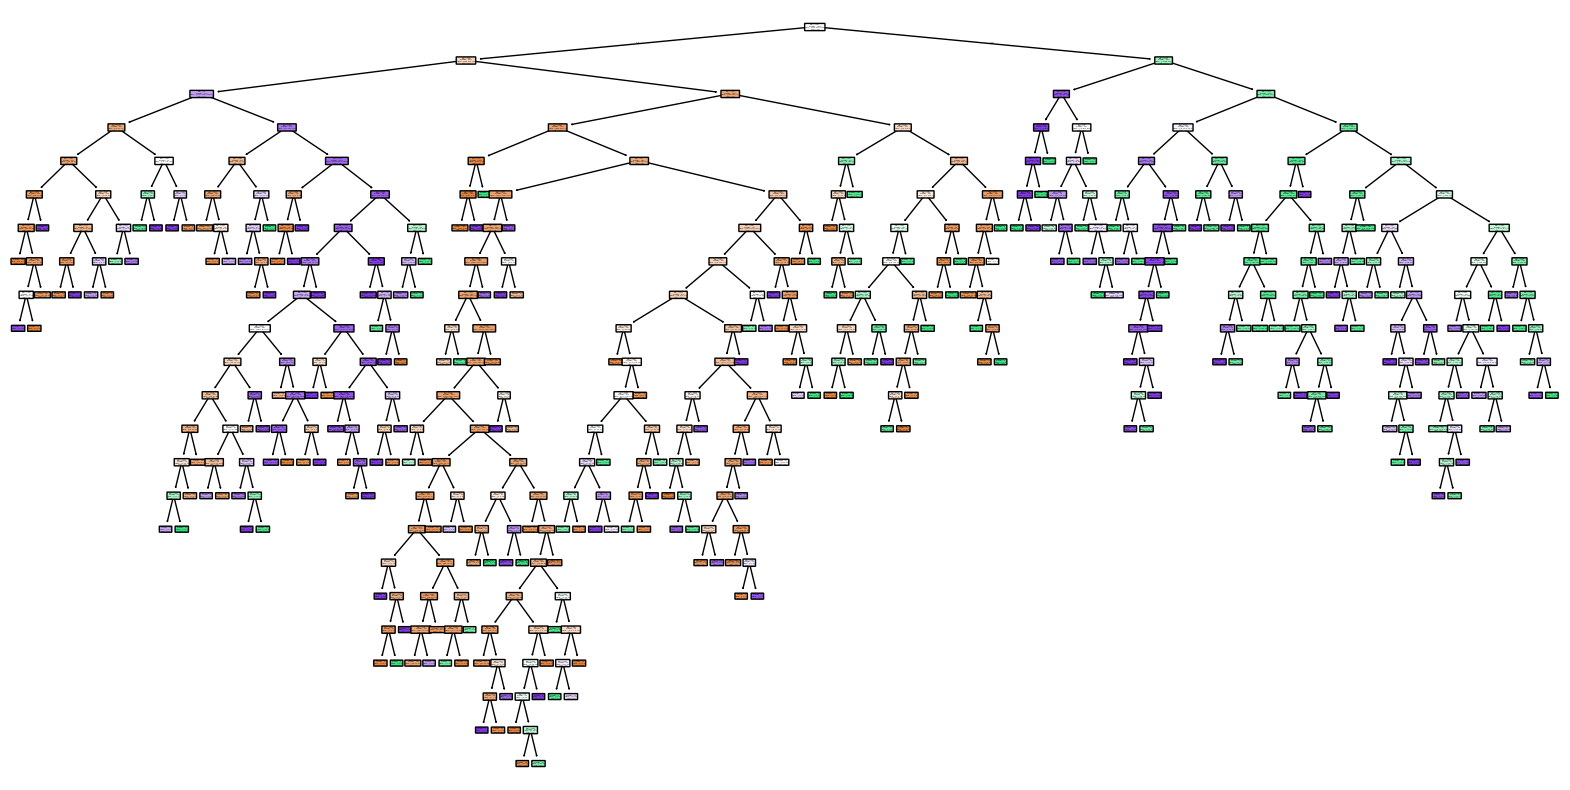

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(pruned_dt,
          filled=True,
          rounded=True,
          class_names=True,
          feature_names=pd.DataFrame(X_train).columns,
          #max_depth=3
         )
plt.show()


In [ ]:
y_t_pred=pruned_dt.predict(X_train)
print(classification_report(y_train,y_t_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      5169
           1       0.87      0.91      0.89      5169
           2       0.92      0.77      0.84      5169

    accuracy                           0.89     15507
   macro avg       0.89      0.89      0.88     15507
weighted avg       0.89      0.89      0.88     15507



In [ ]:
y_pred=pruned_dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.83      0.67       366
           1       0.66      0.78      0.72       666
           2       0.87      0.68      0.76      1293

    accuracy                           0.73      2325
   macro avg       0.70      0.76      0.72      2325
weighted avg       0.76      0.73      0.73      2325



**Now the generalisation on test data is better.**

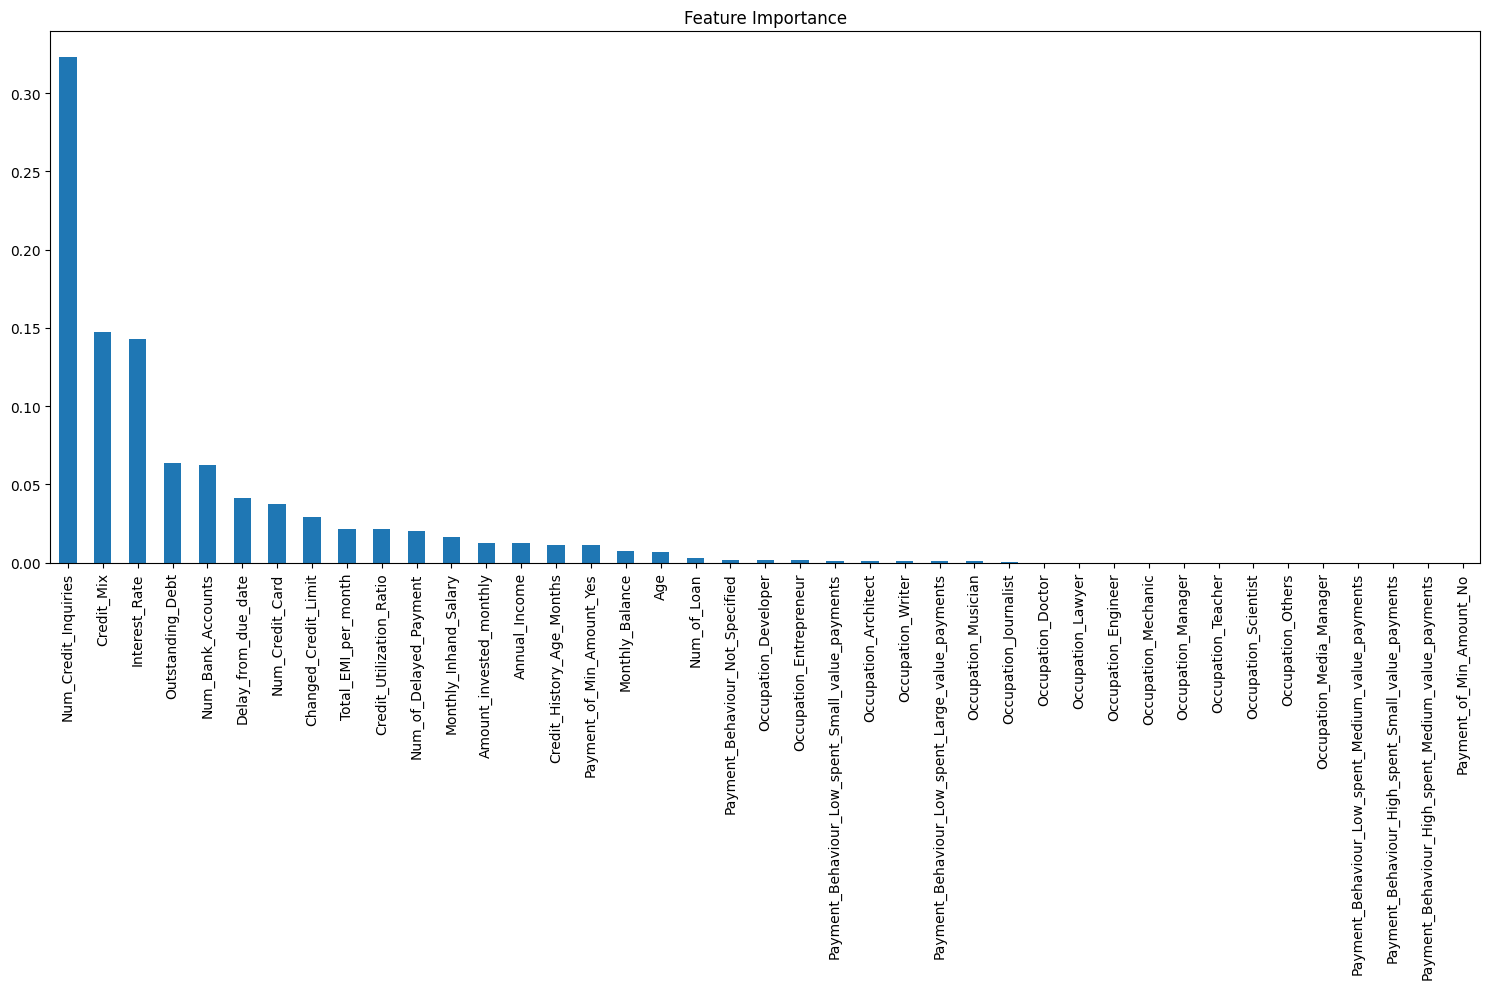

In [ ]:
plt.figure(figsize=(15, 10))
feat_importance = pd.Series(pruned_dt.feature_importances_, index=df1.drop("Credit_Score",axis=1).columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
features=df1.drop("Credit_Score",axis=1).columns
thresold=dt.feature_importances_>0.01
print(features[thresold])
print(len(features[thresold]),"Features")
l1=features[thresold]

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_Months'],
      dtype='object')
17 Features


## **Random Forest Classifier**

### **Higher Accuracy RF Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,max_depth=20,class_weight={0:1,1:2,2:3})
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2, 2: 3}, max_depth=20,
                       random_state=42)

In [ ]:
y_t_pred=rf.predict(X_train)
print(classification_report(y_train,y_t_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5169
           1       1.00      1.00      1.00      5169
           2       1.00      1.00      1.00      5169

    accuracy                           1.00     15507
   macro avg       1.00      1.00      1.00     15507
weighted avg       1.00      1.00      1.00     15507



In [ ]:
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68       366
           1       0.73      0.76      0.74       666
           2       0.87      0.71      0.78      1293

    accuracy                           0.75      2325
   macro avg       0.72      0.78      0.74      2325
weighted avg       0.78      0.75      0.76      2325





1.   **This indicates perfect performance on the training set, which is not realistic for most real-world problems.**
2.   **This is a clear sign of overfitting — even though Random Forest reduces overfitting compared to decision trees, it can still memorize the training data if not constrained.**





**Since I want to improve recall rate of class 1 so let us introduce another RF model which has higher recall for class 1(Concerned about correctly identifying customers having poor creditworthiness).**

### **Higher Recall Rate RF Model**

In [ ]:
rf1=RandomForestClassifier(random_state=42,max_depth=10,n_estimators=10,max_features=0.8,class_weight={0:1,1:5,2:1})
rf1.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5, 2: 1}, max_depth=10,
                       max_features=0.8, n_estimators=10, random_state=42)

In [ ]:
y_t_pred=rf1.predict(X_train)
print(classification_report(y_train,y_t_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5169
           1       0.78      0.98      0.86      5169
           2       0.97      0.63      0.77      5169

    accuracy                           0.85     15507
   macro avg       0.87      0.85      0.84     15507
weighted avg       0.87      0.85      0.84     15507



In [ ]:
y_pred=rf1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68       366
           1       0.59      0.89      0.71       666
           2       0.95      0.58      0.72      1293

    accuracy                           0.71      2325
   macro avg       0.70      0.77      0.70      2325
weighted avg       0.79      0.71      0.71      2325



**There is a trade-off between accuracy and recall rate. Now we are having lesser accuracy.**

### **Constructing Voting Ensemble With Both RF Models**

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('High_Accuracy', rf),
    ('High_Recall', rf1),

], voting='soft')

voting.fit(X_train, y_train)


VotingClassifier(estimators=[('High_Accuracy',
                              RandomForestClassifier(class_weight={0: 1, 1: 2,
                                                                   2: 3},
                                                     max_depth=20,
                                                     random_state=42)),
                             ('High_Recall',
                              RandomForestClassifier(class_weight={0: 1, 1: 5,
                                                                   2: 1},
                                                     max_depth=10,
                                                     max_features=0.8,
                                                     n_estimators=10,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
y_pred=voting.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69       366
           1       0.64      0.86      0.74       666
           2       0.94      0.61      0.74      1293

    accuracy                           0.73      2325
   macro avg       0.71      0.79      0.72      2325
weighted avg       0.79      0.73      0.73      2325



**Now we got satisfactory accuracy(73%) with 86% recall rate of class POOR.**

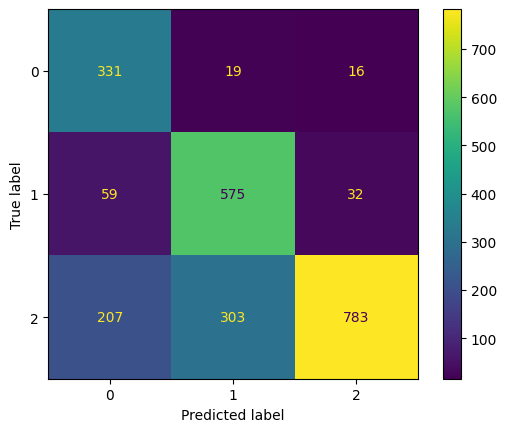

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(voting, X_test, y_test)
plt.show()

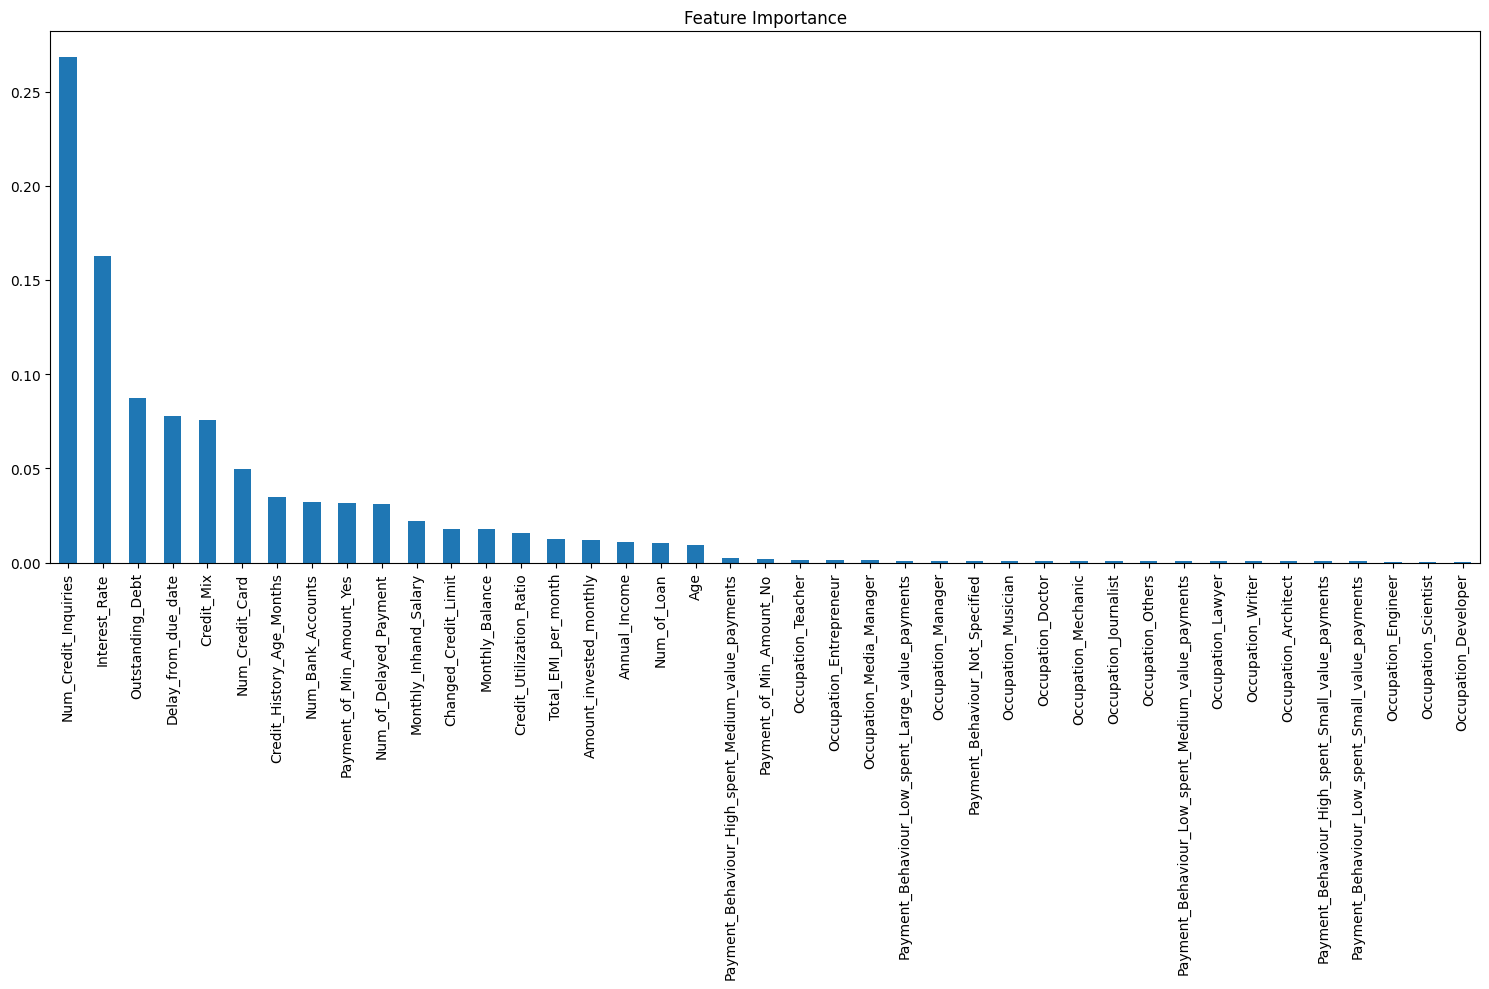

In [ ]:
plt.figure(figsize=(15, 10))
feat_importance = pd.Series(rf1.feature_importances_, index=df1.drop("Credit_Score",axis=1).columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
features=df1.drop("Credit_Score",axis=1).columns
thresold=rf.feature_importances_>0.01
print(features[thresold])
print(len(features[thresold]),"Features")
l2=features[thresold]

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_Months', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes'],
      dtype='object')
20 Features


## **XG Boost Classifier**

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=2,random_state=42,num_parallel_tree=3)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=3, objective='multi:softprob', ...)

In [ ]:
y_t_pred=xgb.predict(X_train)
print(classification_report(y_train,y_t_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      5169
           1       0.83      0.85      0.84      5169
           2       0.86      0.68      0.76      5169

    accuracy                           0.82     15507
   macro avg       0.83      0.82      0.82     15507
weighted avg       0.83      0.82      0.82     15507



In [ ]:
y_pred=xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.92      0.68       366
           1       0.68      0.81      0.74       666
           2       0.91      0.64      0.75      1293

    accuracy                           0.73      2325
   macro avg       0.71      0.79      0.72      2325
weighted avg       0.79      0.73      0.74      2325



**This model is also overfitting on training set but giving satisfactory accoracy with 81% of recall rate.**

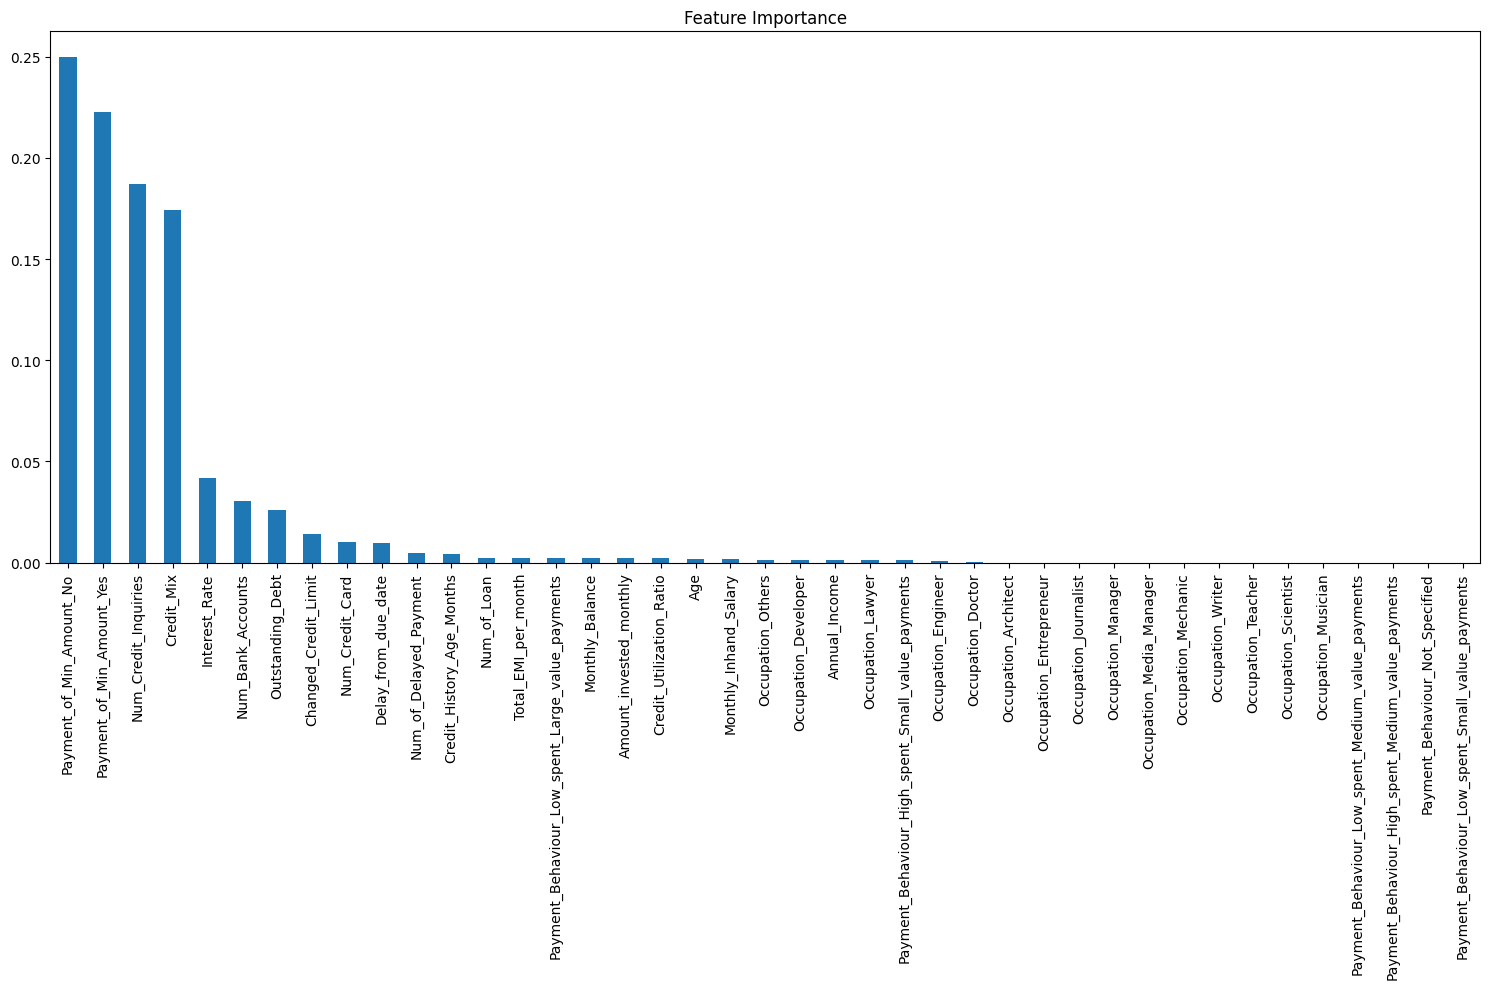

In [ ]:
plt.figure(figsize=(15, 10))
feat_importance = pd.Series(xgb.feature_importances_, index=df1.drop("Credit_Score",axis=1).columns).sort_values(ascending=False)
feat_importance.plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
features=df1.drop("Credit_Score",axis=1).columns
thresold=xgb.feature_importances_>0.01
print(features[thresold])
print(len(features[thresold]),"Features")
l3=features[thresold]

Index(['Num_Bank_Accounts', 'Interest_Rate', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes'],
      dtype='object')
8 Features


# **Stepping Towards The Final Model**

In [ ]:
l1=list((l1))
l2=list((l2))
l3=list((l3))
top_features=list(set(l1+l2+l3))
len(set(l1+l2+l3))

20

In [ ]:
from sklearn.model_selection import train_test_split

# Select the top features before splitting the data
X1 = df1[top_features]
y = df1["Credit_Score"]

X_train,X_test,y_train,y_test=train_test_split(X1, y,test_size=0.2,random_state=9,stratify=y)

In [ ]:
rf=RandomForestClassifier(random_state=42,max_depth=20,class_weight={0:1,1:2,2:3})
rf.fit(X_train,y_train)
rf1=RandomForestClassifier(random_state=42,max_depth=10,n_estimators=10,max_features=0.8,class_weight={0:1,1:7,2:1})
rf1.fit(X_train,y_train)
#xgb=XGBClassifier(n_estimators=2,random_state=42,num_parallel_tree=3)
#xgb.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 7, 2: 1}, max_depth=10,
                       max_features=0.8, n_estimators=10, random_state=42)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('High_Accuracy',rf),
     ('High_Recall', rf1),
    #('XGB',xgb)

], voting='soft')

voting.fit(X_train, y_train)

VotingClassifier(estimators=[('High_Accuracy',
                              RandomForestClassifier(class_weight={0: 1, 1: 2,
                                                                   2: 3},
                                                     max_depth=20,
                                                     random_state=42)),
                             ('High_Recall',
                              RandomForestClassifier(class_weight={0: 1, 1: 7,
                                                                   2: 1},
                                                     max_depth=10,
                                                     max_features=0.8,
                                                     n_estimators=10,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
y_pred=voting.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.71      0.66       366
           1       0.65      0.84      0.73       666
           2       0.86      0.69      0.77      1293

    accuracy                           0.74      2325
   macro avg       0.71      0.75      0.72      2325
weighted avg       0.76      0.74      0.74      2325



**Now we got satisfactory accuracy(74%) with 84% recall rate of class POOR with only 20 top features instead of 41. This reduces the complexity of the model.**


# **Hyperparameter Tuning of The Final Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

# Focus only on Class 1
scorer = make_scorer(recall_score, average=None, labels=[1])

param_grid = {
    'High_Accuracy__n_estimators': [5,10],
    'High_Accuracy__max_depth': [10,20],
    'High_Recall__n_estimators': [10,20],
    'High_Recall__max_depth': [10,20],
}

grid = GridSearchCV(
    estimator=voting,
    param_grid=param_grid,
    scoring=scorer,   # Or use 'recall_weighted' if class 1 is dominant
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('High_Accuracy',
                                                     RandomForestClassifier(class_weight={0: 1,
                                                                                          1: 2,
                                                                                          2: 3},
                                                                            max_depth=20,
                                                                            random_state=42)),
                                                    ('High_Recall',
                                                     RandomForestClassifier(class_weight={0: 1,
                                                                                          1: 7,
                                                                                          2: 1},
                                                                            max_depth=10,
                                                                            max_features=0.8,
                                                                            n_estimators=10,
                                                                            random_state=42))],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'High_Accuracy__max_depth': [10, 20],
                         'High_Accuracy__n_estimators': [5, 10],
                         'High_Recall__max_depth': [10, 20],
                         'High_Recall__n_estimators': [10, 20]},
             scoring=make_scorer(recall_score, response_method='predict', average=None, labels=[1]))

In [ ]:
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       366
           1       0.65      0.84      0.73       666
           2       0.84      0.70      0.76      1293

    accuracy                           0.73      2325
   macro avg       0.71      0.73      0.71      2325
weighted avg       0.75      0.73      0.74      2325



**After hyperparameter tuning and cross validation we found the best model with 73% accuracy and 84% recall rate of class POOR using only 20 TOP FEATURES.**

In [ ]:
grid.best_params_

{'High_Accuracy__max_depth': 20,
 'High_Accuracy__n_estimators': 10,
 'High_Recall__max_depth': 10,
 'High_Recall__n_estimators': 20}